In [1]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

#### First Part: Describe the behavior of stocks using clusters (via K-means)

In [2]:
# Take your stock, take 2017- 52 weeks
HMC = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

In [3]:
HMC_2017 = HMC.copy()
HMC_2017['Date'] = pd.to_datetime(HMC_2017['Date'])
start_date = '01-01-2017'
end_date = '01-08-2018'
mask = (HMC_2017['Date'] > start_date) & (HMC_2017['Date'] <= end_date)
HMC_2017 = HMC_2017.loc[mask]

In [4]:
HMC_2017['Return'] = HMC_2017['Adj Close'].pct_change()
HMC_2017['Day of week'] = HMC_2017['Date'].dt.weekday_name
HMC_2017

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Day of week
831,2017-01-03,29.480000,29.610001,29.420000,29.610001,28.554270,864500,NaN,Tuesday
832,2017-01-04,30.209999,30.670000,30.209999,30.660000,29.566833,705500,0.035461,Wednesday
833,2017-01-05,30.620001,30.780001,30.580000,30.660000,29.566833,482600,0.000000,Thursday
834,2017-01-06,30.350000,30.580000,30.240000,30.469999,29.383608,493600,-0.006197,Friday
835,2017-01-09,30.370001,30.500000,30.299999,30.430000,29.345034,585200,-0.001313,Monday
836,2017-01-10,30.139999,30.270000,30.020000,30.100000,29.026800,849600,-0.010845,Tuesday
837,2017-01-11,30.070000,30.180000,29.900000,30.180000,29.103947,809300,0.002658,Wednesday
838,2017-01-12,30.180000,30.290001,29.809999,30.160000,29.084658,737600,-0.000663,Thursday
839,2017-01-13,30.049999,30.120001,29.990000,30.080000,29.007515,427100,-0.002652,Friday
840,2017-01-17,29.719999,29.840000,29.610001,29.660000,28.602489,770200,-0.013963,Tuesday


In [5]:
date_index = HMC_2017["Date"].tolist()
date_index2 = pd.date_range('01-01-2017', periods=370, freq='D')

In [6]:
# find out the missing data 
HMC_2017_returns = pd.DataFrame({"Daily return": HMC_2017["Return"].tolist(), "Day of week":HMC_2017["Day of week"].tolist()}, index = date_index)
HMC_2017_returns = HMC_2017_returns.reindex(date_index2)
HMC_2017_returns= HMC_2017_returns[8:] # starting from Monday

In [7]:
HMC_2017_returns = HMC_2017_returns.reset_index()

In [8]:
# get vectors of weekly returns

number_of_week = [] 
weekly_returns = [] 

for row in range(len(HMC_2017_returns)):
    daily_return = HMC_2017_returns.loc[row]['Daily return']  
    if row%7 ==0: # Monday --> create a new vector & add daily return in it
        weekly_return = []
        weekly_return.append(daily_return)
    elif row%7 == 1 or row%7 == 2 or row%7 == 3: # Tues, Wed, Thurs --> add daily return in the vector
        weekly_return.append(daily_return)
    elif row%7 == 4: # Friday --> add daily return in the vector & add the vector to a list of all vectors 
        weekly_return.append(daily_return)
        weekly_returns.append(weekly_return)
#weekly_returns

- Q: what do you do with missing data?
- A: average of returns in this week /interpolation

In [9]:
# replace missing value with 
#(1) mean if it is the first or last number of the vector 
#(2) interpolation if it is in the middle of the vector

def replace_missing_value(vector):
    series = pd.Series(vector)
    if series.hasnans == True:
        series = series.interpolate()
    if series.hasnans == True:
        series = series.fillna(series.mean())
    complete_list = series.tolist()
    return complete_list
        

In [10]:
complete_weekly_returns = []
for i in range(len(weekly_returns)):
    complete_list = replace_missing_value(weekly_returns[i])
    complete_list=[round(elem, 3) for elem in complete_list]
    complete_weekly_returns.append(complete_list) 

#complete_weekly_returns   

In [11]:
# assign labels for each day --> 1= good days, 0 = bad days
labels = []
for i in range(len(complete_weekly_returns)):
    returns_per_week = complete_weekly_returns[i]
    labels_per_week = [1 if returns_per_week[j]>=0 else 0 for j in range(len(returns_per_week))]
    labels.append(labels_per_week)
    
labels

[[0, 0, 1, 0, 0],
 [1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 1, 1],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1],
 [0, 1, 1, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0],
 [0, 0, 0, 1, 1],
 [1, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 1, 1],
 [1, 1, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [0, 0, 1, 1, 0],
 [1, 0, 0, 1, 1],
 [1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1],
 [1, 1, 1, 0, 0],
 [0, 1, 1, 0, 1],
 [1, 0, 1, 0, 0],
 [0, 1, 1, 1, 1],
 [1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1],
 [0, 1, 0, 1, 1],
 [1, 0, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0],
 [1, 1, 0, 1, 1],
 [1, 1, 1, 0, 1],
 [1, 1, 1, 0, 0],
 [1, 1, 0, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [1, 1, 1, 1, 0],
 [0, 1, 0, 1, 1],
 [1, 0, 0, 1, 0],
 [1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1],
 [1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1]]

#### Apply k-means to split your data into k clusters

#### A. Find a “good” number for k using the knee method (max cluster)

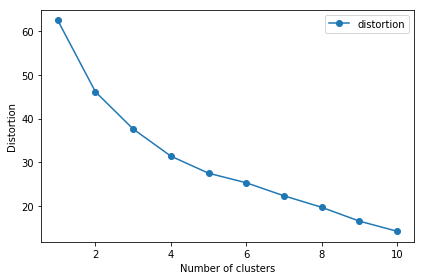

In [12]:
#X = np.asarray(complete_weekly_returns)
X = np.asarray(labels)

max_num_clusters = 10
distortions = []
for i in range(1, max_num_clusters + 1):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o', label='distortion')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig(os.path.join(file_dir, 'distortion knee.pdf'), dpi=300)
plt.show()

when k = 5 (the number of clusters) is the best for clustering

#### B. run k-means for that value of k

In [13]:
km = KMeans(n_clusters=5, init='random', 
            n_init=10, max_iter=300, tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

clusters = [label+1 for label in y_km]

#### C.	For each cluster, draw a histogram showing percentage of good and bad weeks

In [14]:
# assign labels for each week --> I define a week is good(1) if it has >2 good days, otherwise, it is a bad(0) week
week_labels = []

for i in range(len(labels)):
    good_days = 0
    bad_days = 0
    for j in range(len(labels[i])):
        if labels[i][j]==1:
            good_days +=1
        else:
            bad_days +=1
    if good_days>2:
        week_labels.append(1)
    else:
        week_labels.append(0)
    
    
#week_labels

In [15]:
#summarize all information
data = {'week': list(range(1,53)), 'daily returns': complete_weekly_returns,'daily labels':labels,'week label': week_labels,'clusters':clusters}
df = pd.DataFrame(data=data)
df

,week,daily returns,daily labels,week label,clusters
0,1,"[-0.001, -0.011, 0.003, -0.001, -0.003]","[0, 0, 1, 0, 0]",0,1
1,2,"[0.003, -0.014, 0.011, 0.012, 0.003]","[1, 0, 1, 1, 1]",1,3
2,3,"[-0.003, -0.002, 0.016, -0.002, -0.021]","[0, 0, 1, 0, 0]",0,1
3,4,"[-0.004, -0.008, 0.008, 0.009, 0.028]","[0, 0, 1, 1, 1]",1,2
4,5,"[-0.006, 0.017, 0.011, -0.013, 0.008]","[0, 1, 1, 0, 1]",1,1
5,6,"[0.018, -0.004, -0.007, -0.009, 0.003]","[1, 0, 0, 0, 1]",0,3
6,7,"[-0.001, 0.005, 0.003, -0.008, -0.005]","[0, 1, 1, 0, 0]",0,1
7,8,"[-0.007, -0.009, 0.01, -0.01, 0.005]","[0, 0, 1, 0, 1]",0,1
8,9,"[-0.006, 0.004, -0.004, 0.0, 0.004]","[0, 1, 0, 1, 1]",1,2
9,10,"[0.0, -0.01, 0.013, 0.001, -0.005]","[1, 0, 1, 1, 0]",1,3


In [16]:
#df.sort_values(['clusters'], ascending=[True])

- For each cluster , compute percentage of good and bad weeks. 
- Can you associate a cluster with mostly good or bad weeks?

In [17]:
good_cluster1 = 0 
good_cluster2 = 0
good_cluster3 = 0
good_cluster4 = 0
good_cluster5 = 0

bad_cluster1 = 0 
bad_cluster2 = 0
bad_cluster3 = 0
bad_cluster4 = 0
bad_cluster5 = 0

for row in range(len(df)):
    if df.loc[row]['clusters'] == 1:
        if df.loc[row]['week label'] == 1:
            good_cluster1 +=1
        else:
            bad_cluster1 +=1
    elif df.loc[row]['clusters'] == 2:
        if df.loc[row]['week label'] == 1:
            good_cluster2 +=1
        else:
            bad_cluster2 +=1        
    elif df.loc[row]['clusters'] == 3:
        if df.loc[row]['week label'] == 1:
            good_cluster3 +=1
        else:
            bad_cluster3 +=1
    elif df.loc[row]['clusters'] == 4:
        if df.loc[row]['week label'] == 1:
            good_cluster4 +=1
        else:
            bad_cluster4 +=1
    else:
        if df.loc[row]['week label'] == 1:
            good_cluster5 +=1
        else:
            bad_cluster5 +=1

total_cluster1 = good_cluster1+bad_cluster1
total_cluster2 = good_cluster2+bad_cluster2
total_cluster3 = good_cluster3+bad_cluster3
total_cluster4 = good_cluster4+bad_cluster4
total_cluster5 = good_cluster5+bad_cluster5


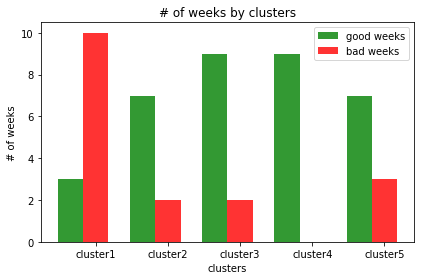

cluster1: # of good weeks= 3(23.08%), # of bad weeks= 10(76.92%), # of total weeks= 13(100%)
cluster2: # of good weeks= 7(77.78%), # of bad weeks= 2(22.22%), # of total weeks= 9(100%)
cluster3: # of good weeks= 9(81.82%), # of bad weeks= 2(18.18%), # of total weeks= 11(100%)
cluster4: # of good weeks= 9(100.0%), # of bad weeks= 0(0.0%), # of total weeks= 9(100%)
cluster5: # of good weeks= 7(70.0%), # of bad weeks= 3(30.0%), # of total weeks= 10(100%)


In [18]:
# data to plot
clusters = 5
good_weeks = (good_cluster1,good_cluster2,good_cluster3,good_cluster4,good_cluster5)
bad_weeks = (bad_cluster1,bad_cluster2,bad_cluster3,bad_cluster4,bad_cluster5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(clusters)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, good_weeks, bar_width,
                 alpha=opacity,
                 color='g',
                 label='good weeks')
 
rects2 = plt.bar(index + bar_width, bad_weeks, bar_width,
                 alpha=opacity,
                 color='r',
                 label='bad weeks')
 
plt.xlabel('clusters')
plt.ylabel('# of weeks')
plt.title('# of weeks by clusters')
plt.xticks(index + bar_width, ('cluster1', 'cluster2', 'cluster3', 'cluster4','cluster5'))
plt.legend()
 
plt.tight_layout()
plt.show()

print("cluster1: # of good weeks= {0}({3}%), # of bad weeks= {1}({4}%), # of total weeks= {2}(100%)".format(good_cluster1,bad_cluster1,total_cluster1,round(good_cluster1/total_cluster1*100,2),round(bad_cluster1/total_cluster1*100,2)))
print("cluster2: # of good weeks= {0}({3}%), # of bad weeks= {1}({4}%), # of total weeks= {2}(100%)".format(good_cluster2,bad_cluster2,total_cluster2,round(good_cluster2/total_cluster2*100,2),round(bad_cluster2/total_cluster2*100,2)))
print("cluster3: # of good weeks= {0}({3}%), # of bad weeks= {1}({4}%), # of total weeks= {2}(100%)".format(good_cluster3,bad_cluster3,total_cluster3,round(good_cluster3/total_cluster3*100,2),round(bad_cluster3/total_cluster3*100,2)))
print("cluster4: # of good weeks= {0}({3}%), # of bad weeks= {1}({4}%), # of total weeks= {2}(100%)".format(good_cluster4,bad_cluster4,total_cluster4,round(good_cluster4/total_cluster4*100,2),round(bad_cluster4/total_cluster4*100,2)))
print("cluster5: # of good weeks= {0}({3}%), # of bad weeks= {1}({4}%), # of total weeks= {2}(100%)".format(good_cluster5,bad_cluster5,total_cluster5,round(good_cluster5/total_cluster5*100,2),round(bad_cluster5/total_cluster5*100,2)))


There is no clear pattern the clusters. But it is worth noting that weeks in cluster 4 are all good and cluster 1 has the most bad weeks among all clusters.

#### D.	Write down the centers of your clusters and see if you can interpret them . If you have singletons, examine

In [19]:
Mon_centers = km.cluster_centers_[:, 0]
Tue_centers = km.cluster_centers_[:, 1]
Wed_centers = km.cluster_centers_[:, 2]
Thu_centers = km.cluster_centers_[:, 3]
Fri_centers = km.cluster_centers_[:, 4]

#cluster centers
center_cluster1 = [Mon_centers[0],Tue_centers[0],Wed_centers[0],Thu_centers[0],Fri_centers[0]]
center_cluster1=[round(elem, 3) for elem in center_cluster1]

center_cluster2 = [Mon_centers[1],Tue_centers[1],Wed_centers[1],Thu_centers[1],Fri_centers[1]]
center_cluster2=[round(elem, 3) for elem in center_cluster2]

center_cluster3 = [Mon_centers[2],Tue_centers[2],Wed_centers[2],Thu_centers[2],Fri_centers[2]]
center_cluster3=[round(elem, 3) for elem in center_cluster3]

center_cluster4 = [Mon_centers[3],Tue_centers[3],Wed_centers[3],Thu_centers[3],Fri_centers[3]]
center_cluster4=[round(elem, 3) for elem in center_cluster4]

center_cluster5 = [Mon_centers[4],Tue_centers[4],Wed_centers[4],Thu_centers[4],Fri_centers[4]]
center_cluster5=[round(elem, 3) for elem in center_cluster5]


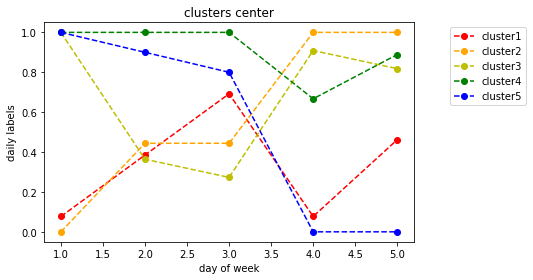

cluster1 center: [0.077, 0.385, 0.692, 0.077, 0.462]
cluster2 center: [0.0, 0.444, 0.444, 1.0, 1.0]
cluster3 center: [1.0, 0.364, 0.273, 0.909, 0.818]
cluster4 center: [1.0, 1.0, 1.0, 0.667, 0.889]
cluster5 center: [1.0, 0.9, 0.8, 0.0, 0.0]


In [20]:
day_of_week = [1,2,3,4,5]


plt.plot(day_of_week, center_cluster1, marker='o', linestyle='--',color='red',label='cluster1')
plt.plot(day_of_week, center_cluster2, marker='o', linestyle='--', color='orange',label='cluster2')
plt.plot(day_of_week, center_cluster3, marker='o', linestyle='--',color='y',label='cluster3')
plt.plot(day_of_week, center_cluster4, marker='o', linestyle='--',color='g',label='cluster4')
plt.plot(day_of_week, center_cluster5, marker='o', linestyle='--',color='b',label='cluster5')

plt.xlabel('day of week')
plt.ylabel('daily labels')
plt.title('cluster''s center')
plt.legend()
plt.tight_layout()
plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
plt.show()

print("cluster1 center:",center_cluster1)
print("cluster2 center:",center_cluster2)
print("cluster3 center:",center_cluster3)
print("cluster4 center:",center_cluster4)
print("cluster5 center:",center_cluster5)

- cluster 2 and cluster 3 have similar patterns, which indicates the increasing daily returns (from Mon to Fri)
- cluster 4's daily returns are higher than other cluster's daily return 
- cluster 1's daily returns are lower than other cluster's daily return 
- cluster 5 has decreasing daily returns (from Mon to Fri)